In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_part1.csv')

In [3]:
data

,Unnamed: 0,id,gender,season,age,tripletsOfMonths,commonRed,commonGreen,commonBlue
0,0,15970,Men,Fall,2,4,254,254,90
1,1,39386,Men,Summer,2,3,40,53,59
2,2,59263,Women,Winter,2,1,234,234,234
3,3,21379,Men,Fall,2,4,50,50,52
4,4,53759,Men,Summer,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...
44441,44441,17036,Men,Summer,2,3,241,242,234
44442,44442,6461,Men,Summer,2,3,223,220,213
44443,44443,18842,Men,Fall,2,4,144,191,221
44444,44444,46694,Women,Spring,2,2,253,253,253


In [10]:
X = data[['tripletsOfMonths', 'commonRed', 'commonGreen', 'commonBlue', 'age']]

I know that most of the data lives in one dimension, as conirmed by PCA in another notebook. Since that really doesn't help me with clustering, I'm going to use 3 clusters anyways. 

In [31]:
kmc = KMeans(3)
kmc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
cluster_labels = kmc.predict(X)

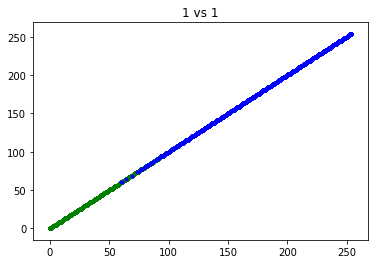

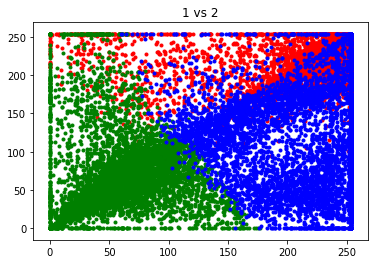

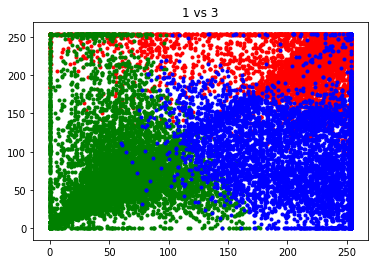

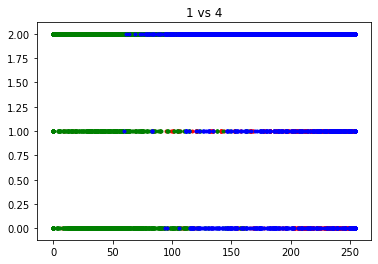

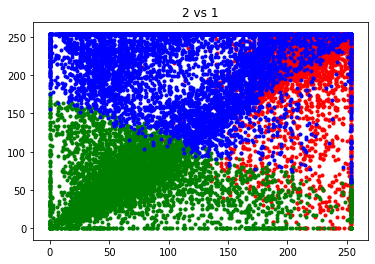

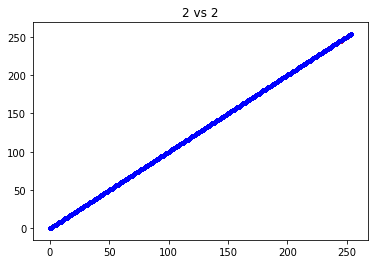

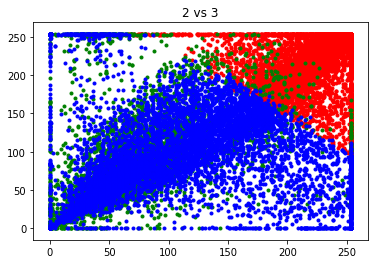

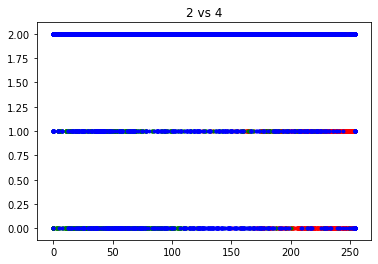

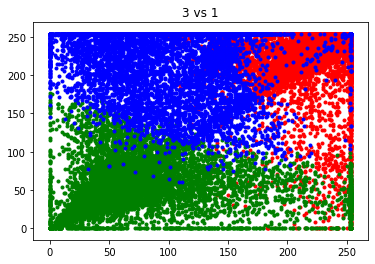

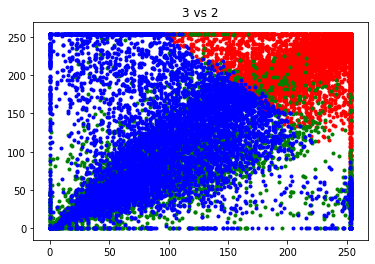

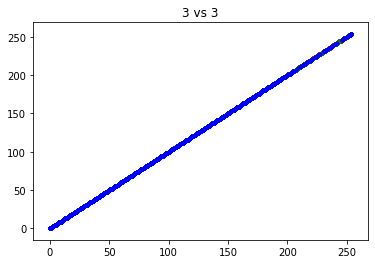

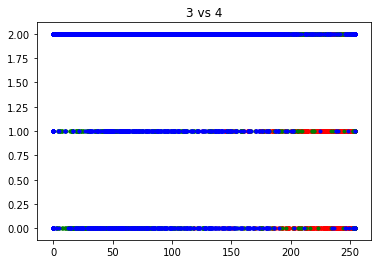

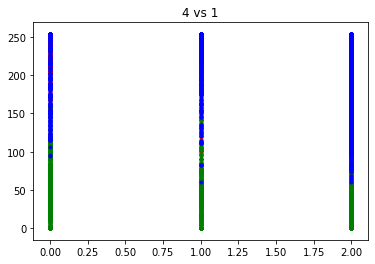

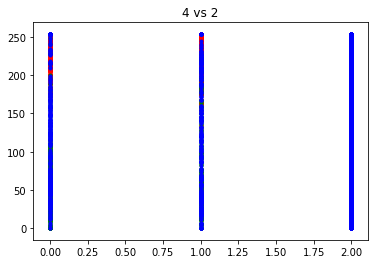

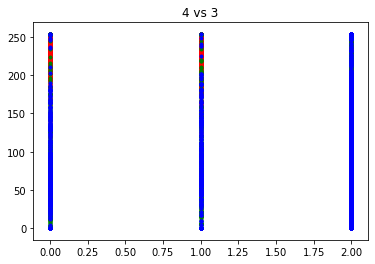

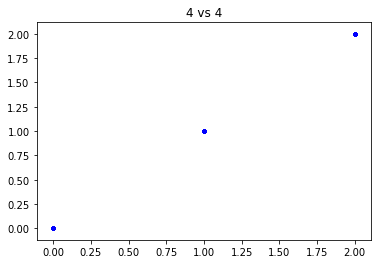

In [33]:
cluster1 = (cluster_labels == 0)
cluster2 = (cluster_labels == 1)
cluster3 = (cluster_labels == 2)

import itertools

dims = np.tile(np.arange(1, len(X.columns)), 2).reshape(2, 4)

for d in list(itertools.product(*dims)):
    plt.scatter(X.iloc[cluster1,d[0]], X.iloc[cluster1, d[1]], marker='.', color='red')
    plt.scatter(X.iloc[cluster2,d[0]], X.iloc[cluster2, d[1]], marker = '.', color='green')
    plt.scatter(X.iloc[cluster3,d[0]], X.iloc[cluster3, d[1]], marker = '.', color='blue')
    plt.title(f'{d[0]} vs {d[1]}')
    plt.show()

As I predicted, not many unique clusters in this data set because of the overpowering common colors data.

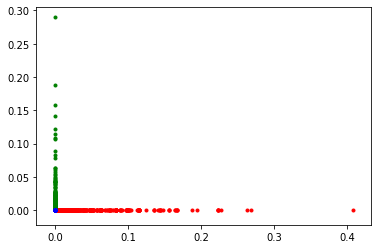

In [34]:
D = kmc.transform(X)
E = np.exp(-D)

plt.scatter(E[cluster1,0], E[cluster1, 1], marker='.', color='red')
plt.scatter(E[cluster2,0], E[cluster2, 1], marker = '.', color='green')
plt.scatter(E[cluster3,0], E[cluster3, 1], marker = '.', color='blue')

Interesting that theres not more data in between the axis